In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix #for confusion matrix

# Evaluate model

다음을 이용해서 모델 평가

- metric
- confusion matrix
- feature importnace

## Metric

In [2]:
# 평가지표 이름 가져오기
metric_dir = '../build/metric'
metric_files = sorted(os.listdir(metric_dir))

# 파일 이름과 평가지표 파싱
metric_list = []
for filename in metric_files:
    path = '../build/metric/' + filename
    with open(path, 'r') as f:
        content = f.read()
    metric_list.append((filename.split('.')[0], content.split()[1][:-2]))
#     print(metric_list[-1])

# 데이터프레임화
df_metric = pd.DataFrame(metric_list, columns=['model', 'metric'])
df_metric.metric = df_metric.metric.astype(float)
# df_metric.set_index('model', inplace=True)

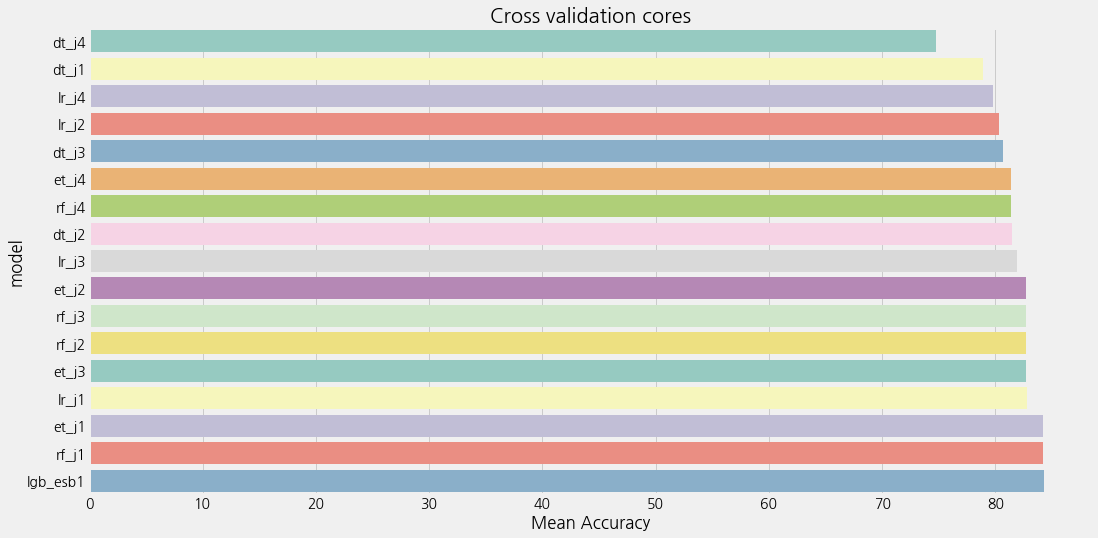

In [3]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
order = df_metric.sort_values(by='metric').model.values

g = sns.barplot('metric', 'model',data=df_metric, palette='Set3', order=order)
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation cores')

## Confusion Matrix

In [4]:
# 타겟값 가져오기
target_file = '../build/feature/y.trn.txt'
target = np.loadtxt(target_file, delimiter=',')

# OOF 예측값 가져오기
pred_dir = '../build/val'
pred_files = sorted(os.listdir(pred_dir))

# 파일 이름과 예측값 파싱
pred_list = []
for filename in pred_files:
    path = '../build/val/' + filename
    pred = np.argmax(np.loadtxt(path, delimiter=','), axis=1)
    pred_list.append((filename.split('.')[0], pred))
    
len(pred_list)

17

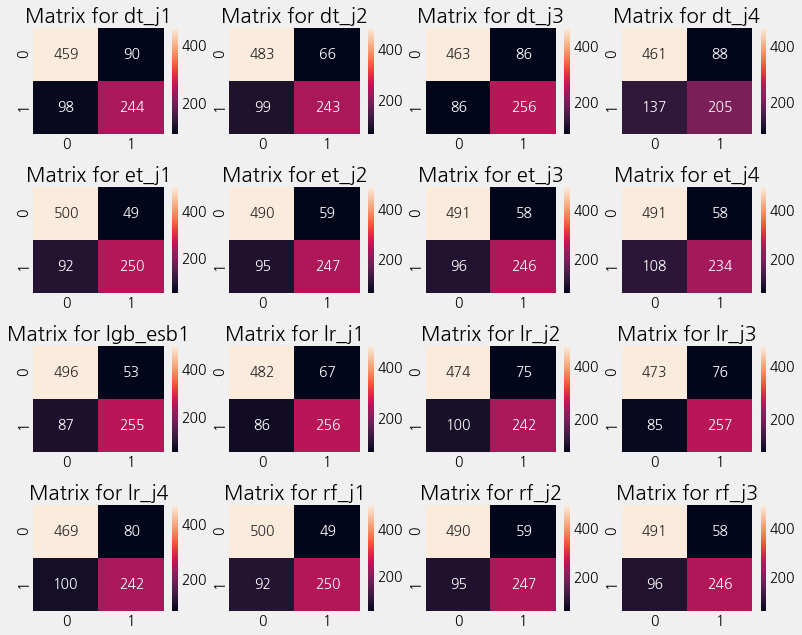

In [5]:
f, ax = plt.subplots(4 , 4, figsize=(12, 10))

for i in range(4):
    for j in range(4):
        model = pred_list[i * 4 + j][0]
        pred = pred_list[i * 4 + j][1]
        sns.heatmap(confusion_matrix(target, pred), ax=ax[i, j], annot=True, fmt='2.0f')
        ax[i, j].set_title(f'Matrix for {model}')
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.show()

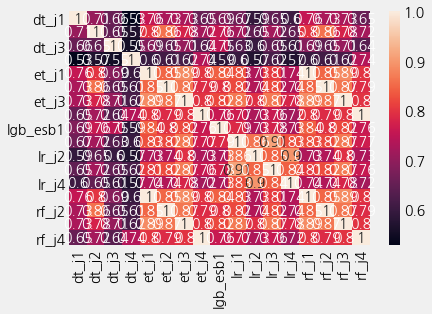

In [6]:
seires_list = []
for model, pred in pred_list:
    seires_list.append(pd.Series(pred, name=model))
    
# Concatnate all classifier reulsts
results = pd.concat(seires_list, axis=1)
g = sns.heatmap(results.corr(), annot=True)

## Feature importance

In [10]:
# imp 이름 가져오기
imp_dir = '../build/imp'
imp_files = sorted(os.listdir(imp_dir))

# 파일 이름과 feature importance 파싱
imp_list = []
for filename in imp_files:
    path = '../build/imp/' + filename
    df = pd.read_csv(path, index_col=0)
    imp_list.append((filename.split('.')[0], df))

len(imp_list)

17

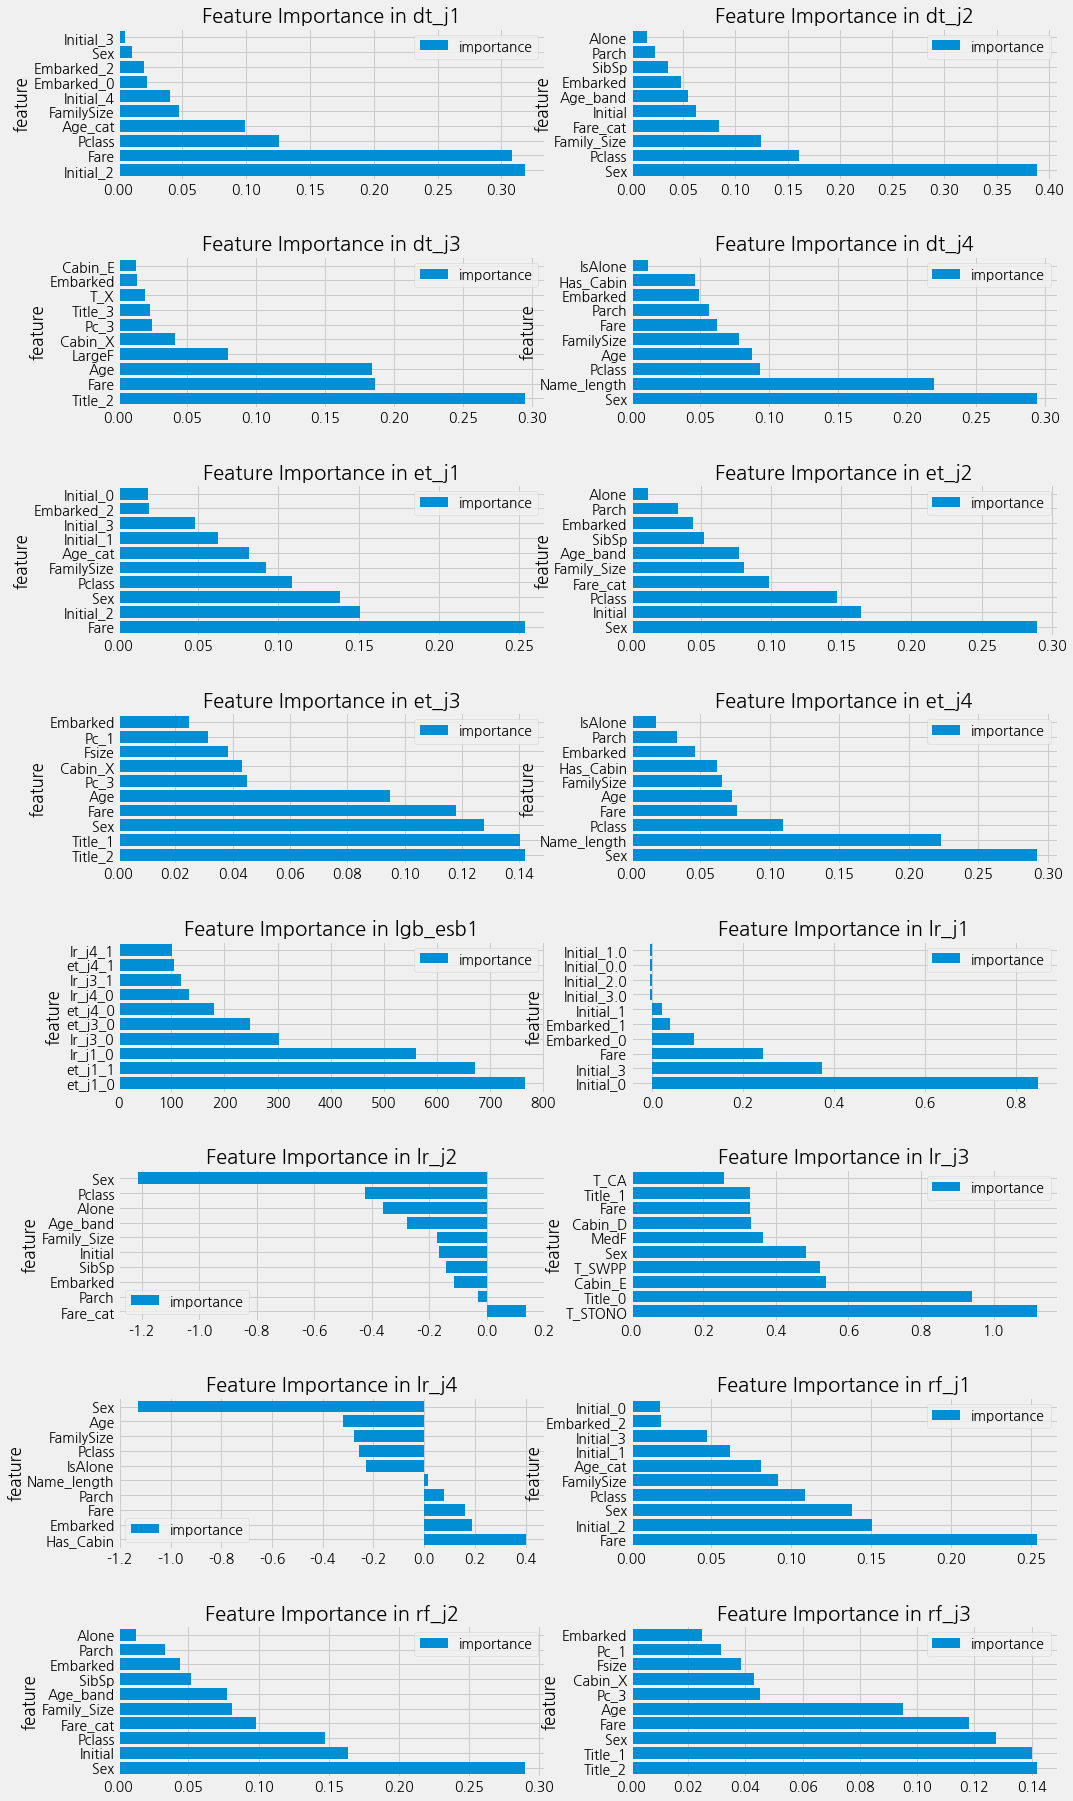

In [11]:
f, ax = plt.subplots(8 , 2, figsize=(15, 30))

for i in range(8):
    for j in range(2):
        model = imp_list[i * 2 + j][0]
        imp_list[i * 2 + j][1].sort_values(by='importance', ascending=False)[:10].plot.barh(width=0.8, ax=ax[i, j])
        ax[i, j].set_title(f'Feature Importance in {model}')
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.show()